In [13]:
from sys import path
path.append('../')

In [14]:
data_path: str = "../data.nosync/dataset_smile_challenge.npy"

# Exploration

In [4]:
from numpy import load, fromiter, ndarray
from seaborn import countplot
from matplotlib.pyplot import (
    ylabel as set_ylabel,
    xlabel as set_xlabel,
    title as plot_title,
    show as show_fig,
    savefig
)
from src.utils.vizualizations import add_text_barplot

In [5]:
data: dict = load(data_path, allow_pickle=True).item()

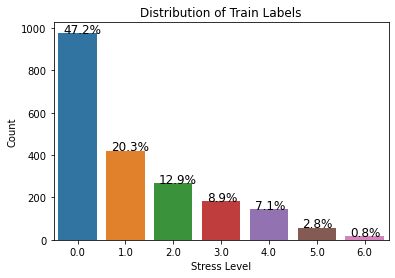

In [6]:
ax = countplot(x=data['train']['labels'])
set_ylabel("Count")
set_xlabel("Stress Level")
plot_title("Distribution of Train Labels")
add_text_barplot(ax, data['train']['labels'], 0.3)
savefig('../visualizations/distribution_train_labels.pdf')
show_fig()

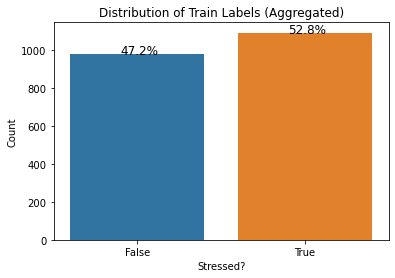

In [7]:
train_labels_aggregatored: ndarray = fromiter(
    (0 if label == 0 else 1 for label in data["train"]["labels"]), bool
)


ax = countplot(x=train_labels_aggregatored)
set_ylabel("Count")
set_xlabel("Stressed?")
plot_title("Distribution of Train Labels (Aggregated)")
add_text_barplot(ax, train_labels_aggregatored, 0.1)

savefig("../visualizations/distribution_train_labels_aggregated.pdf")
show_fig()


From the distribution plots, a few simple conclusions can be made:
1. If we use a **binary** classification, the classes are almost equally distributed: in this case, it probably is not necessary to apply any "rebalancing" or similar.
2. If we use a **multiclass** classification, the classes are not equally distributed: in this case, it is important to figure out what to do with it.

In [12]:
from IPython.display import display, Markdown as md

display(md("Dimension of features in train set"))
for feature_class_keys in data['train'].keys():
    display(md(f"## {feature_class_keys}"))    
    if isinstance(data['train'][feature_class_keys], dict):
        for feature_keys in data['train'][feature_class_keys].keys():
            display(md(f"\t\t{feature_keys}: {data['train'][feature_class_keys][feature_keys].shape}"))
    else:
        display(md(f"\t\t{data['train'][feature_class_keys].shape}"))

Dimension of features in train set

## deep_features

		ECG_features_C: (2070, 60, 256)

		ECG_features_T: (2070, 60, 64)

		masking: (2070, 60)

## hand_crafted_features

		ECG_features: (2070, 60, 8)

		GSR_features: (2070, 60, 12)

		ECG_masking: (2070, 60)

		GSR_masking: (2070, 60)

## labels

		(2070,)

# Questions

We have a set of questions to pose to the challange organizers, which are listed here.

* What the "masking" features that are present in the dataset? 
* In the website, only 8 GSR features are described: however, the challange has 12. What are these?
* Is it possible to know which features are which? Indeed, are they ordered as described on the website? (Obviously for the hand-crafter features, since for the others it does not make any sense)

# Simple ML-models